In [25]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [26]:
class BatsmanState(TypedDict):

    runs: int
    balls: int
    num_fours: int
    num_sixes: int

    strike_rate: float
    ball_per_boundary: float
    boundary_percentage: float
    summary: str

In [33]:
def calculate_strike_rate(state:BatsmanState):

    strike_rate = (state["runs"] / state["balls"]) * 100
    
    return {'strike_rate': strike_rate}

In [34]:
def calculate_ball_per_boundary(state:BatsmanState):

    total_boundaries = state["num_fours"] + state["num_sixes"]
    ball_per_boundary = state["balls"] / total_boundaries if total_boundaries > 0 else 0
    
    return {'ball_per_boundary': ball_per_boundary}

In [35]:
def calculate_boundary_percentage(state:BatsmanState):

    boundary_percent=((state['num_fours']* 4) + (state['num_sixes']*6))/ state['runs'] * 100
    
    return {'boundary_percentage': boundary_percent}

In [36]:
def summary(state:BatsmanState) -> str:

    summary = f"""

Strike Rate: {state['strike_rate']:.2f}
Balls per Boundary: {state['ball_per_boundary']:.2f}
Boundary Percentage: {state['boundary_percentage']:.2f}%

"""
    return {'summary': summary}

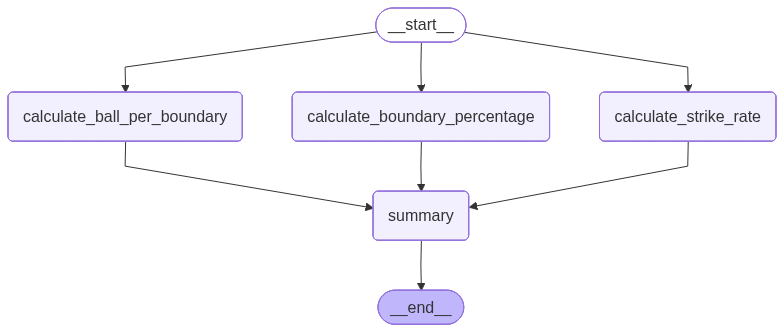

In [39]:
graph = StateGraph(BatsmanState)


#nodes
graph.add_node("calculate_strike_rate", calculate_strike_rate)
graph.add_node("calculate_ball_per_boundary", calculate_ball_per_boundary)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("summary",summary)

#edges
graph.add_edge(START, "calculate_strike_rate")
graph.add_edge(START, "calculate_ball_per_boundary")
graph.add_edge(START, "calculate_boundary_percentage")

graph.add_edge("calculate_strike_rate", "summary")
graph.add_edge("calculate_ball_per_boundary", "summary")
graph.add_edge("calculate_boundary_percentage", "summary")

graph.add_edge("summary", END)

workflow = graph.compile()

workflow

In [38]:
initial_state = {
    "runs": 150,
    "balls": 120,
    "num_fours": 15,
    "num_sixes": 5,
}
workflow.invoke(initial_state)

{'runs': 150,
 'balls': 120,
 'num_fours': 15,
 'num_sixes': 5,
 'strike_rate': 125.0,
 'ball_per_boundary': 6.0,
 'boundary_percentage': 60.0,
 'summary': '\n\nStrike Rate: 125.00\nBalls per Boundary: 6.00\nBoundary Percentage: 60.00%\n\n'}